#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
warnings.filterwarnings("ignore")
import pycountry
%matplotlib inline

#### Import the CSV Data as Pandas DataFrame


In [2]:
df = pd.read_csv("ds_cleaned.csv")

#### Show Top 5 Records


In [3]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Updated_Job_Title
0,2020,MI,Full-time,Data Scientist,70000,EUR,79833,DE,0,DE,L,Data Scientist
1,2020,SE,Full-time,Machine Learning Scientist,260000,USD,260000,Others,0,Others,S,Machine Learning Engineer
2,2020,SE,Full-time,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Data Engineer
3,2020,MI,Full-time,Product Data Analyst,20000,USD,20000,Others,0,Others,S,Data Analyst
4,2020,SE,Full-time,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Machine Learning Engineer


#### Shape of the dataset


In [4]:
df.shape

(607, 12)

#### Summary of the dataset
- The described method will help to see how data has been spread for numerical values.
- We can clearly see the minimum value, mean values, different percentile values, and maximum values.

In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


#### Check Datatypes in the dataset


info() is used to check the Information about the data and the datatypes of each respective attribute.


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
 11  Updated_Job_Title   607 non-null    object
dtypes: int64(4), object(8)
memory usage: 57.0+ KB


#### Insights
- Most of the data is categorical, As data has 7 object and 4 numeric feature.
- There are no missing values

In [7]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

We have 8 categorical features : ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size', 'Updated_Job_Title']


### Univariate Analysis
- The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are:
- Bivariate Analysis: The analysis of two variables.
- Multivariate Analysis: The analysis of two or more variables.

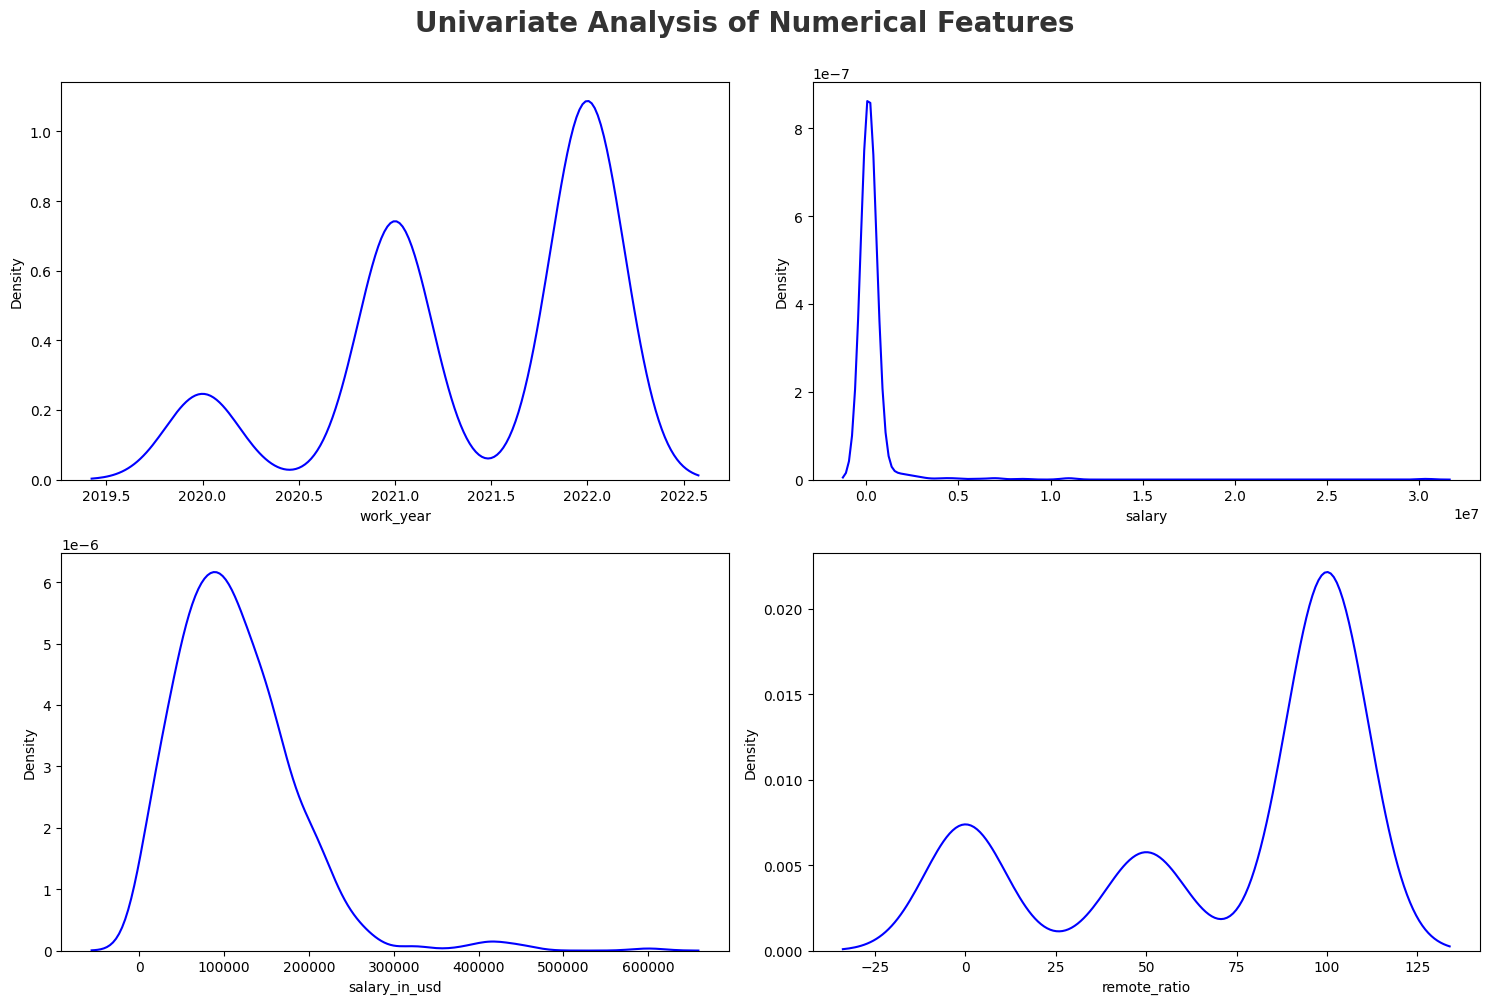

In [8]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [9]:
unwanted_categories = {'experience_level', 'job_title', 'salary_currency','Updated_Job_Title'}
categorical_features = [element for element in categorical_features if element not in unwanted_categories]

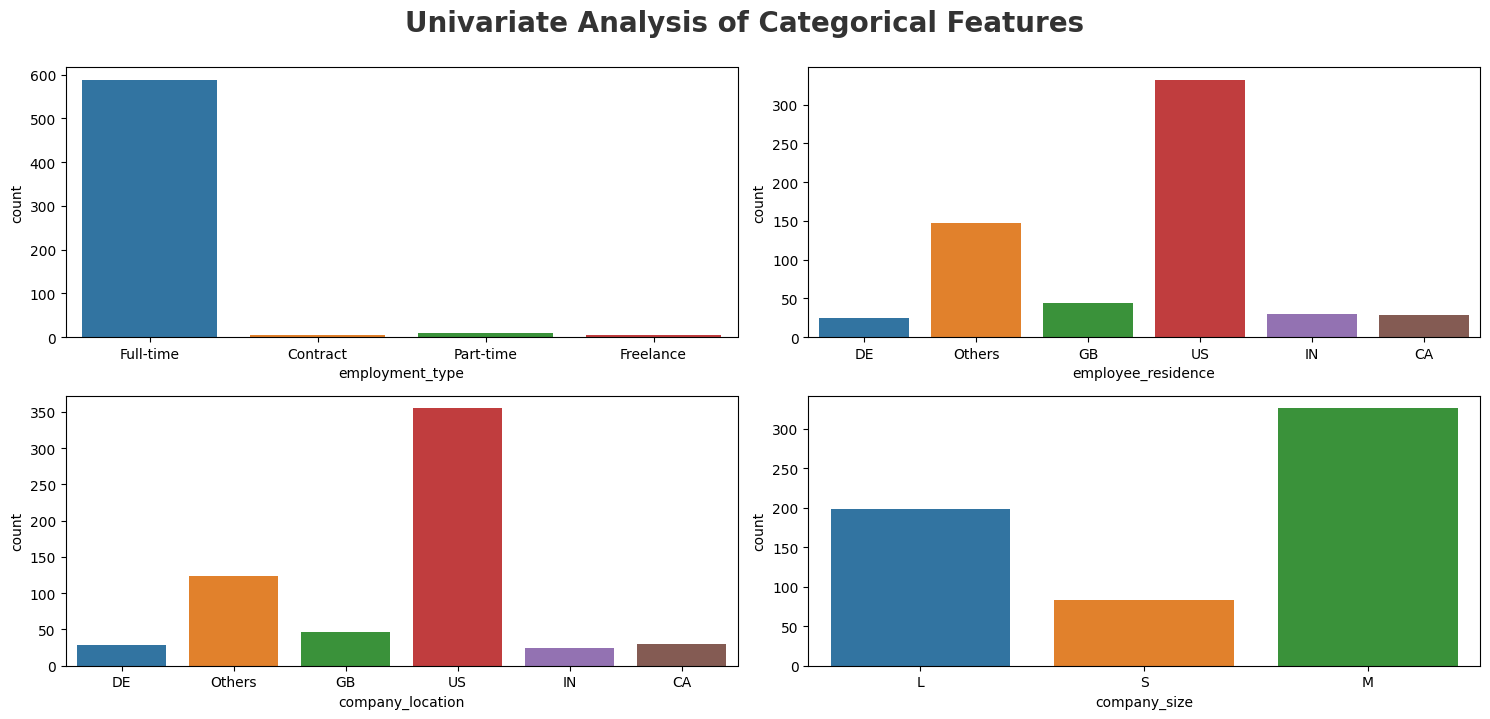

In [10]:
# categorical columns
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

#### Insights
- Higher number of the employees are located in US which justifies the fact that most of the companies are of US.
- Almost all of the employee are full time employees indicating it is difficult to get a part-time job in data science domain.
- Majority of the companies are Medium Sized companies.
- Most of the companies are flexible as most of them have high remote ratio.

#### Job Title - How many job titles are there in our dataset ?

In [11]:
print('how many job titles in the dataset: ',df['job_title'].value_counts().size)
top_job_titles = df.groupby('job_title').size().reset_index().sort_values(by=0,ascending = False)
top_job_titles.head()

how many job titles in the dataset:  50


,job_title,0
22,Data Scientist,143
17,Data Engineer,132
12,Data Analyst,97
38,Machine Learning Engineer,41
48,Research Scientist,16


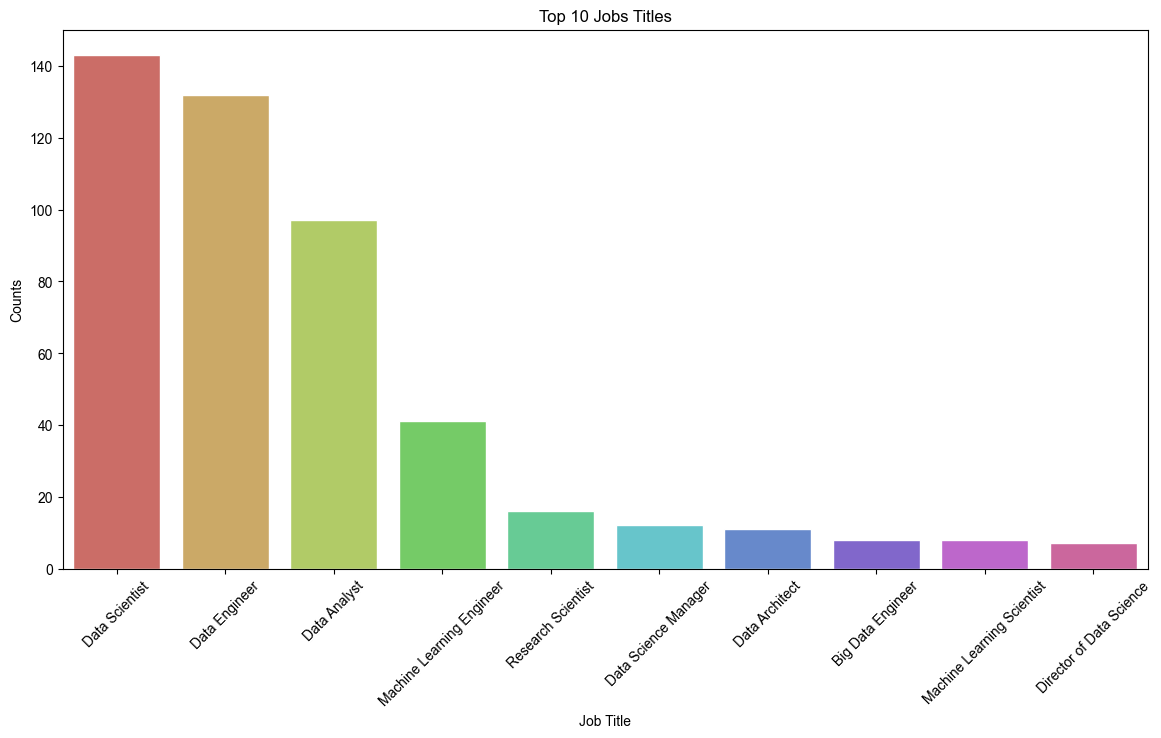

In [12]:
plt.subplots(figsize=(14,7))
sns.set_style("darkgrid")
sns.barplot(x='job_title',y=0,data = top_job_titles[:10],palette = 'hls')
plt.title('Top 10 Jobs Titles')
plt.xlabel('Job Title')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

#### Inference
- Data scientist, data engineer and data analyst ranked top 3 frequent job titles.

#### Employment Type - What kind of employment type is most frequent ?


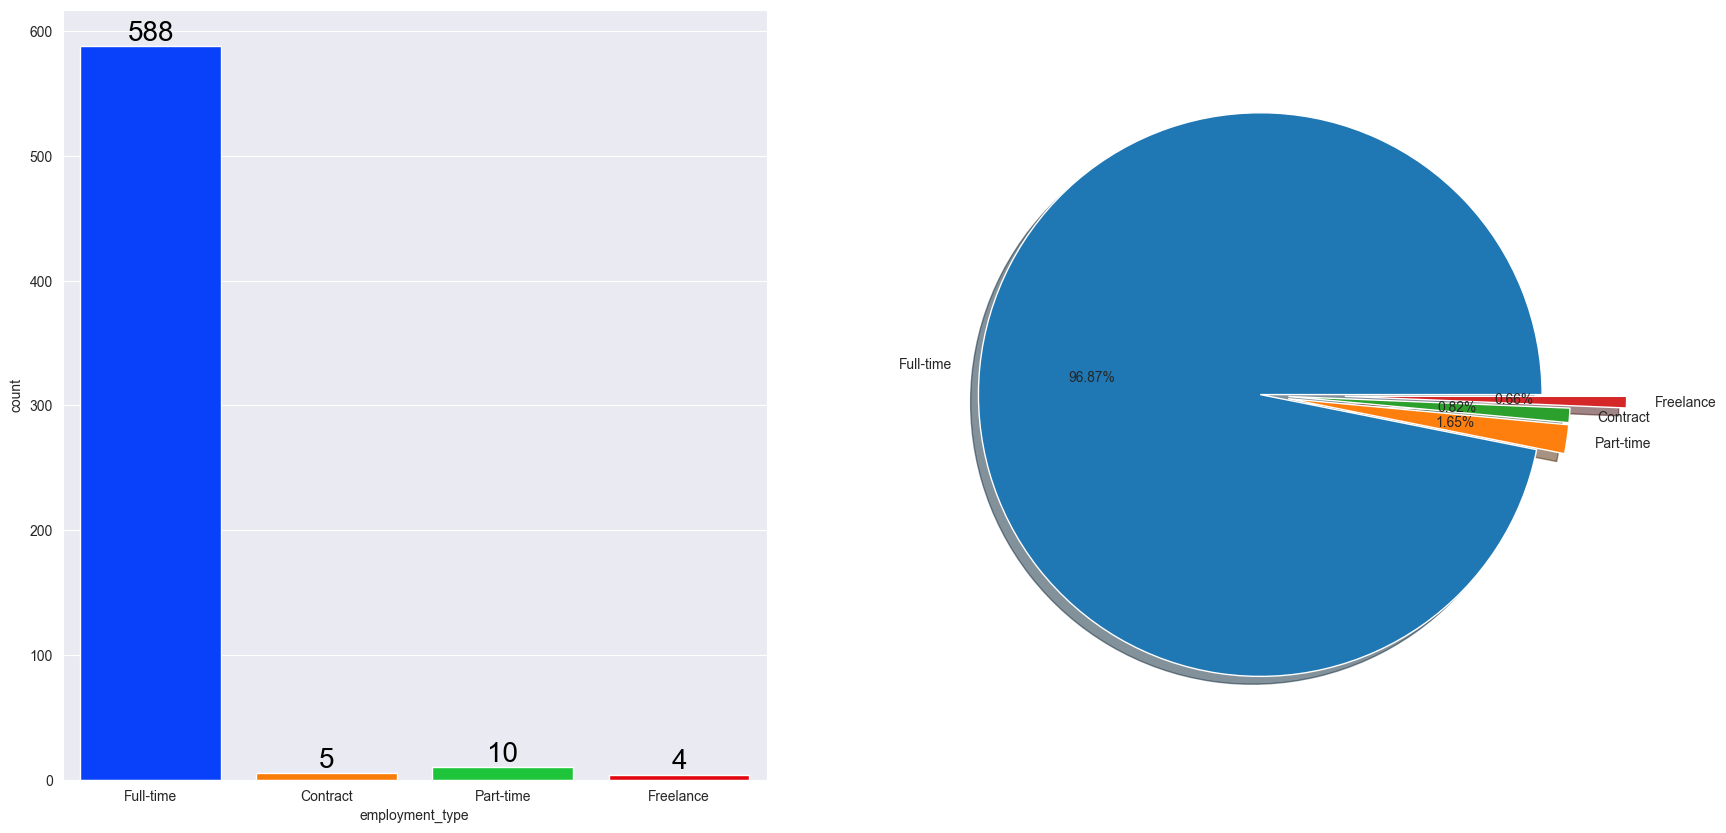

In [13]:
emp_type = df.employment_type.value_counts()
explode = [0,0.1,0.1, 0.3]
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['employment_type'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['employment_type'].value_counts(),labels=emp_type.index,explode=explode,autopct='%1.2f%%',shadow=True)
plt.show()

#### Insights
- It is observed that most of the Employees are doing Full Time Jobs.
- As observed lowest number of he Employees are doing Freelance.

#### Location - Where most of Data Science Companies are located ?


Text(0.5, 1.0, 'Most of Data Science Companies are locations')

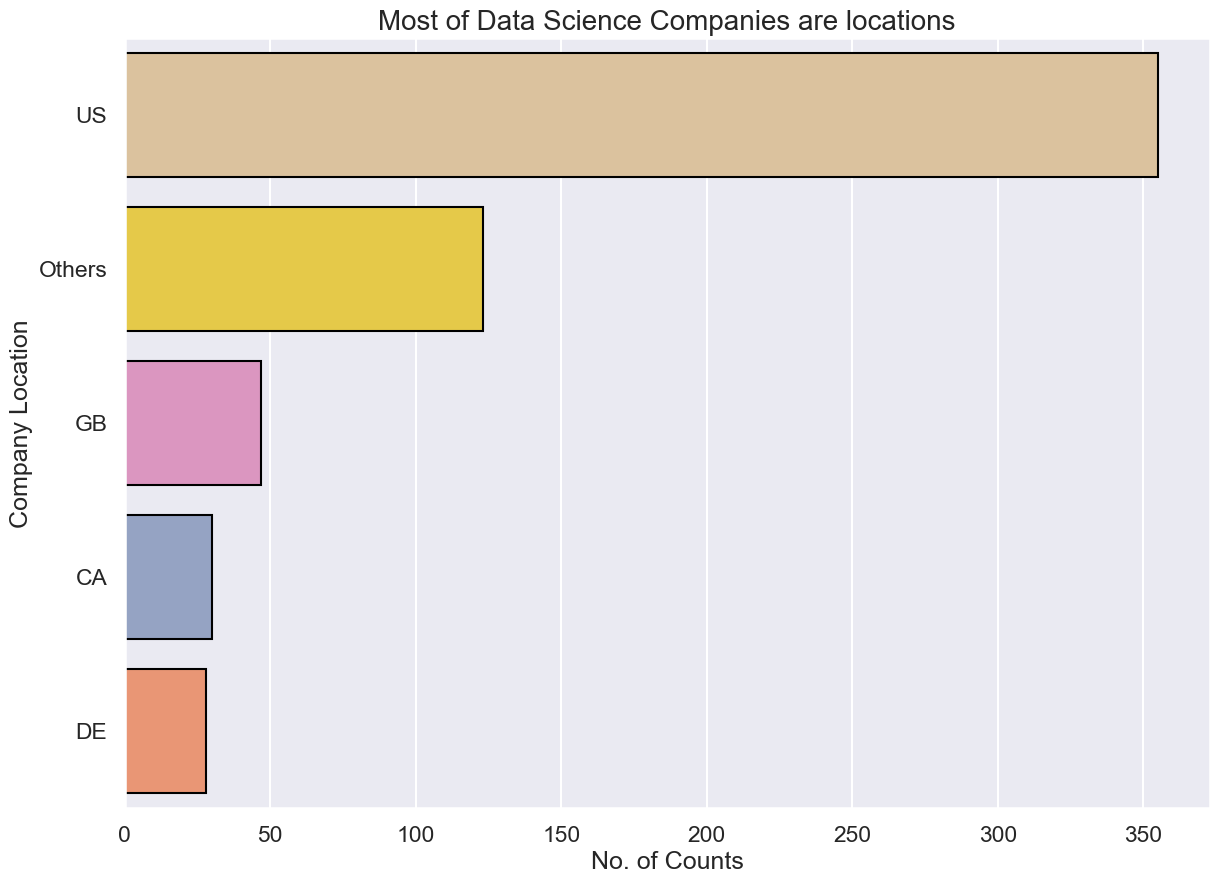

In [14]:
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")
locations = df.company_location.value_counts().head(5)
ax = sns.barplot(x = locations.values , y = locations.index , data = df, ec = "black", palette="Set2_r" )
ax.set_xlabel('No. of Counts')
ax.set_ylabel('Company Location')
ax.set_title("Most of Data Science Companies are locations", size = 20)

#### Insights
- It is observed that most of Data Science Companies are located at USA.

#### Employee Location - Where do most data scientist live ?


<Axes: xlabel='employee_residence', ylabel='0'>

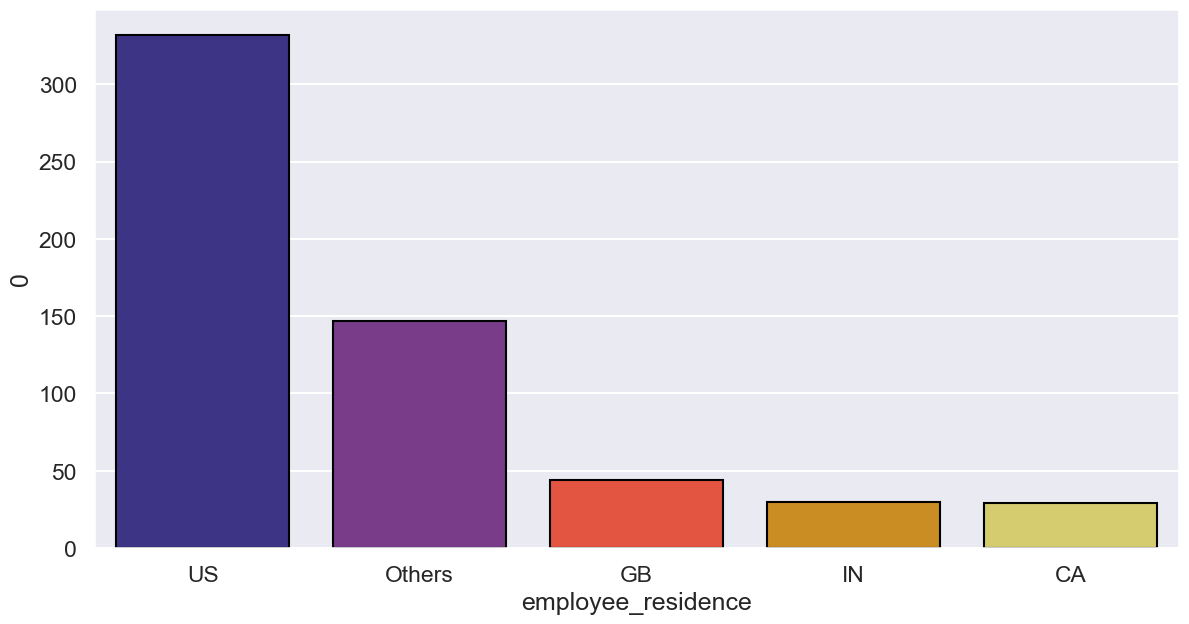

In [15]:
residence = df.groupby('employee_residence').size().sort_values(ascending =False).reset_index().head()
plt.subplots(figsize=(14,7))
sns.barplot(x="employee_residence", y = 0,data= residence,ec = "black",palette="CMRmap")

#### Insights
- Most of the employees reside in US which conincides with the fact that most of the companies are of US.
- India is 3rd country where most employees are located.

In [16]:
# clean
df.company_size.replace(['M','L',"S"], ['Medium', 'Large' ,'Small'],inplace = True)

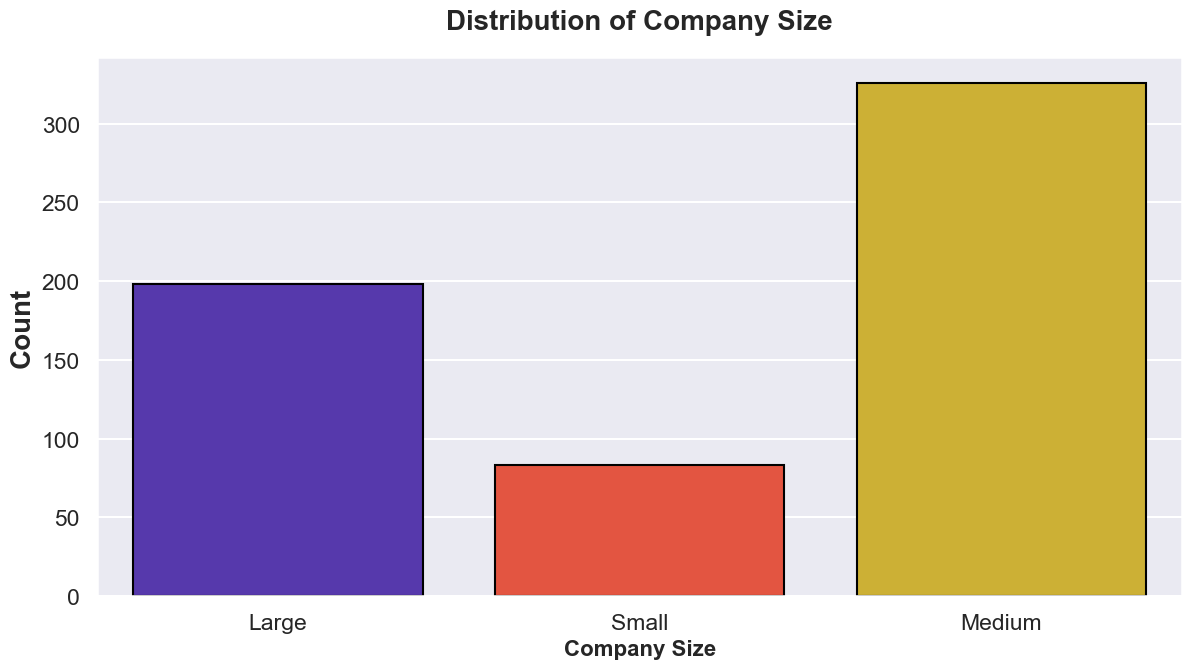

In [17]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.company_size, data= df,ec = "black",palette="CMRmap")
plt.title("Distribution of Company Size", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Company Size", weight="bold", fontsize=16)
plt.show()

#### Insights
- It can be easily seen that company size mostly consists of 'medium size' and the 'large size' ranked the next.

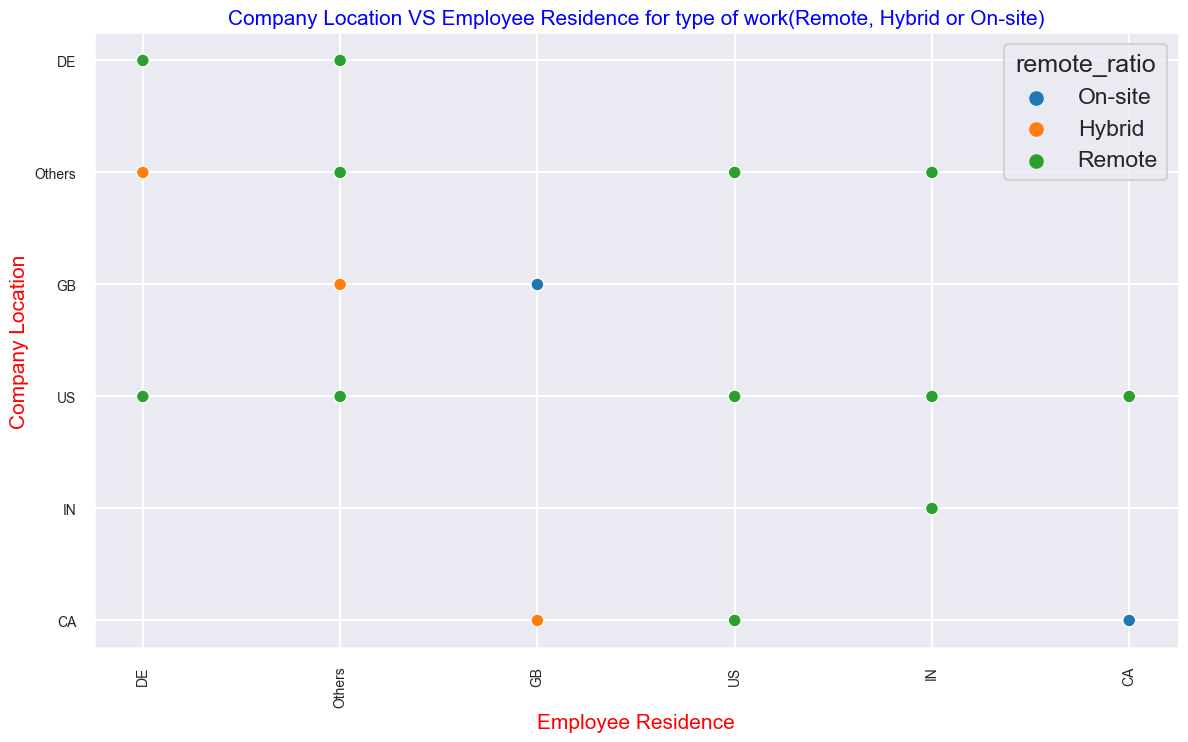

In [18]:
# clean
df.remote_ratio.replace([100,50,0], ['Remote', 'Hybrid' ,'On-site'],inplace = True)
plt.figure(figsize=(14,8)) 
sns.scatterplot(data=df,y=df.company_location.sort_values(),x=df.employee_residence.sort_values(),color="g", hue=df['remote_ratio'])
plt.xticks(rotation='vertical',size=10)
plt.yticks(size=10)
plt.xlabel("Employee Residence",size=15,c="r")
plt.ylabel('Company Location',size=15,c="r")
plt.title("Company Location VS Employee Residence for type of work(Remote, Hybrid or On-site)",size=15,c="b")
plt.show()

#### Insights
- It is observed that most of the remote employees were from different Countries.

#### work_year - What trend Data science jobs are following ?


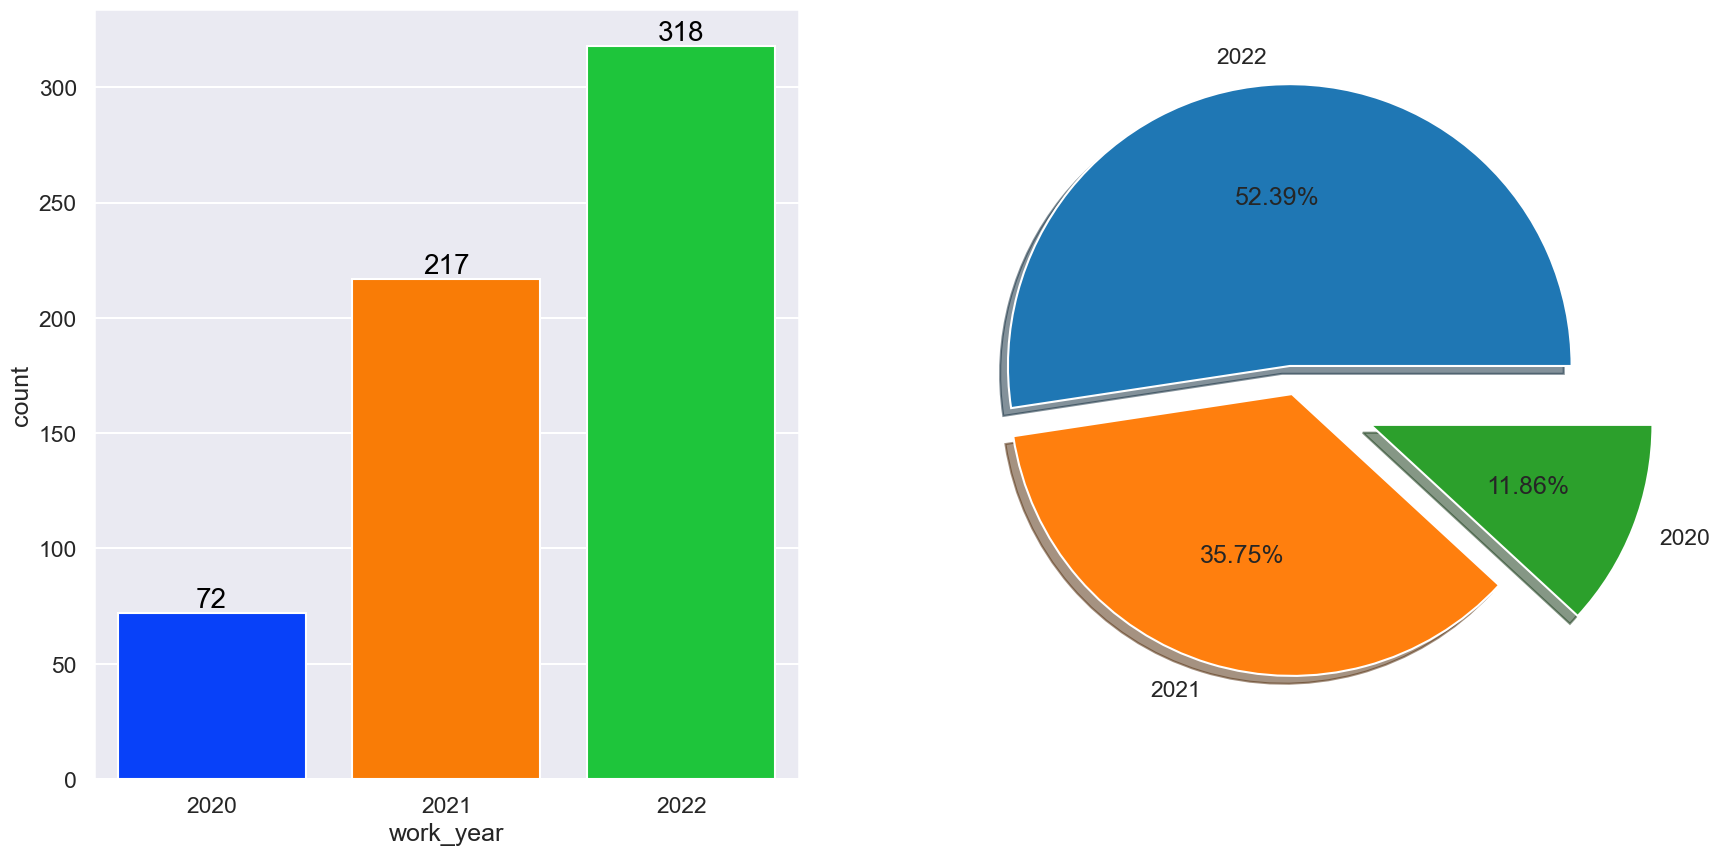

In [19]:
work_yr = df.work_year.value_counts()
explode = [0.1,0,0.3]
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['work_year'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['work_year'].value_counts(),labels=work_yr.index,explode=explode,autopct='%1.2f%%',shadow=True)
plt.show()

#### Insights
- Among all 3 years most of the salaries were paid in 2022.Year - 2022 is 52.39% of whole distribution of year.

#### salary_in_usd - What is average salary Data scientist receiving ?


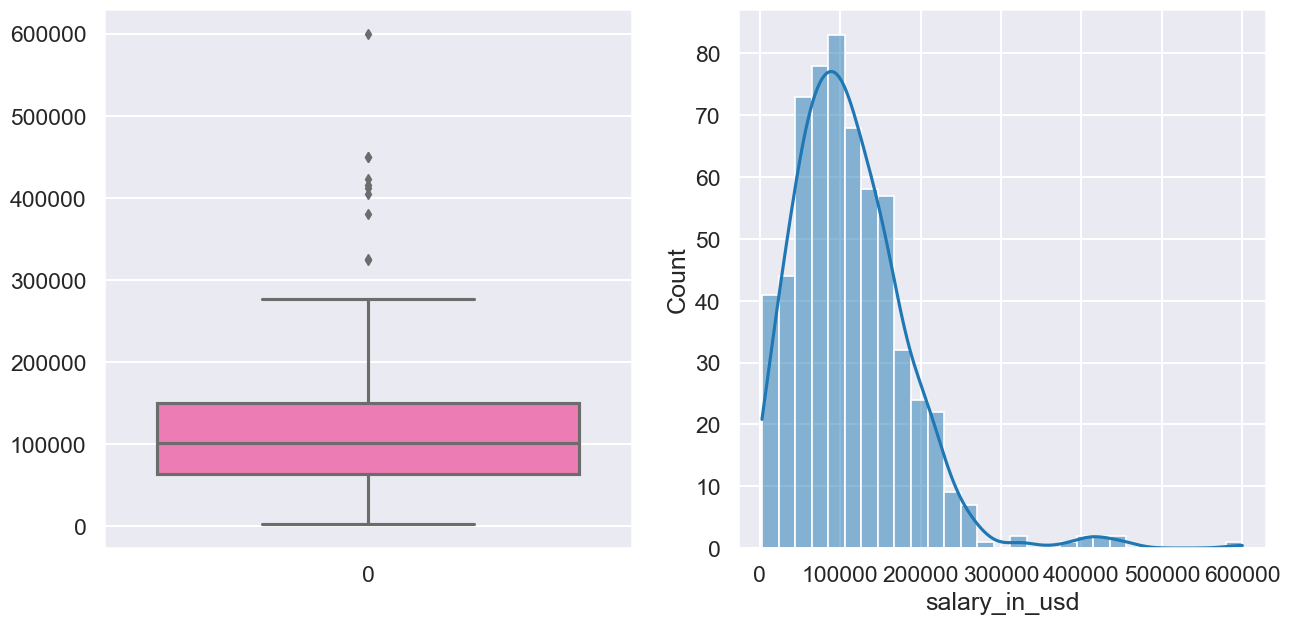

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.boxplot(df['salary_in_usd'],color='hotpink')
plt.subplot(122)
sns.histplot(data=df,x=df['salary_in_usd'],kde=True)
plt.show()

#### Insights
- We can see that salary mostly distributed between 100k and 150k.
- We can trea Above 300K as outliers.

#### Employment Type by Experience Level
- EN, which refers to Entry-level / Junior
- MI, which refers to Mid-level / Intermediate
- SE, which refers to Senior-level / Expert
- EX, which refers to Executive-level / Director

In [21]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level/Director')

<Axes: xlabel='employment_type', ylabel='count'>

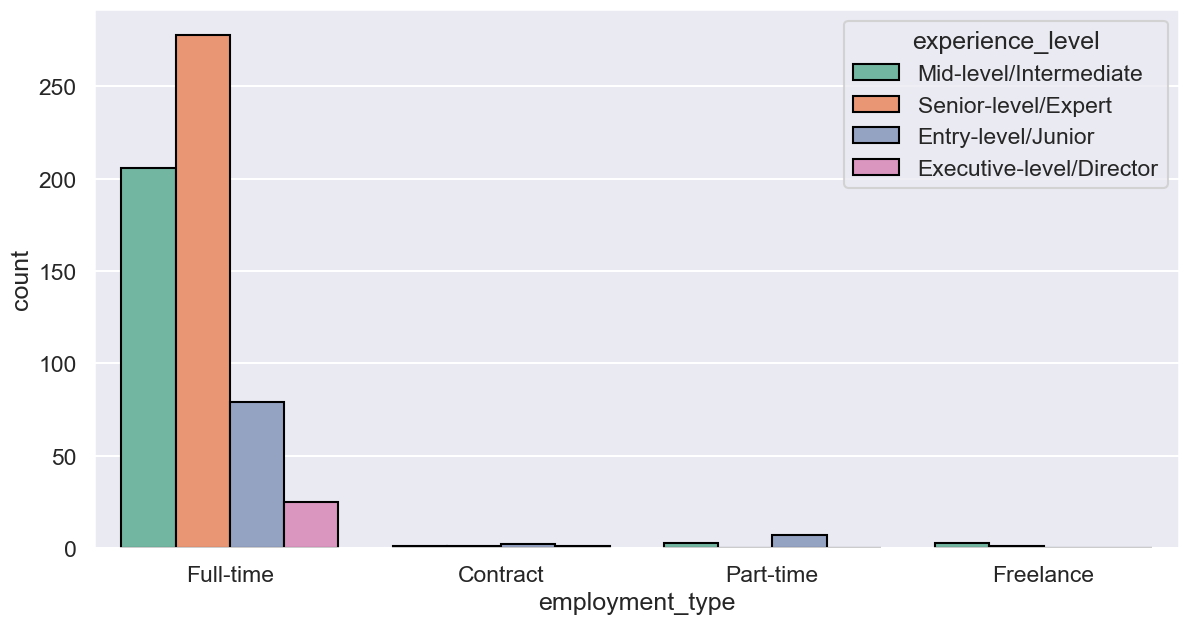

In [22]:
plt.figure(figsize=(14,7)) 
sns.countplot(x="employment_type",hue="experience_level", data=df,ec = "black",palette="Set2")

#### Insights
- Almost all of the employee are full time employees indicating it is difficult to get a part-time job in data science domian.
- We can see that type of Part-Time consists of Entry-level and Mid-level.
- Additionally, type of Freelance consists of Mid-level and Senior-level.

#### What's the relation between salary and experience ?


<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

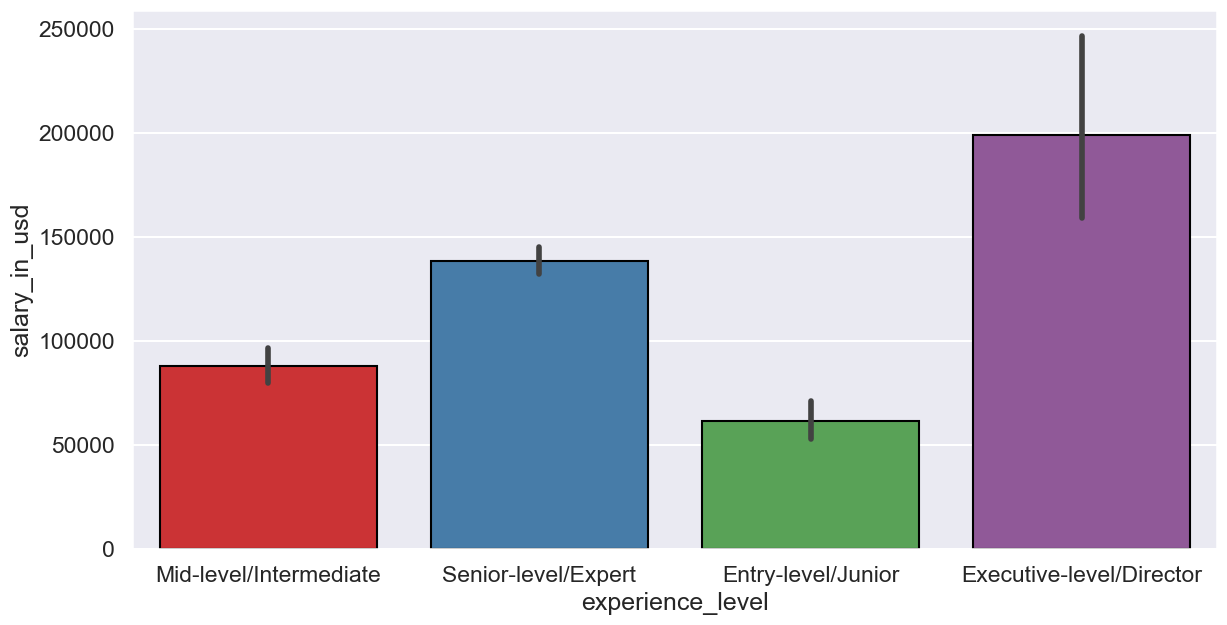

In [23]:
plt.figure(figsize=(14,7)) 
sns.barplot(x = df['experience_level'], y = df['salary_in_usd'],ec = "black",palette="Set1")

#### Insights
- It's noticeable that as experience level increases so does salary.
- Entry-level/junior are geting lowest salary.

#### Is there any relation between salary and job title ?

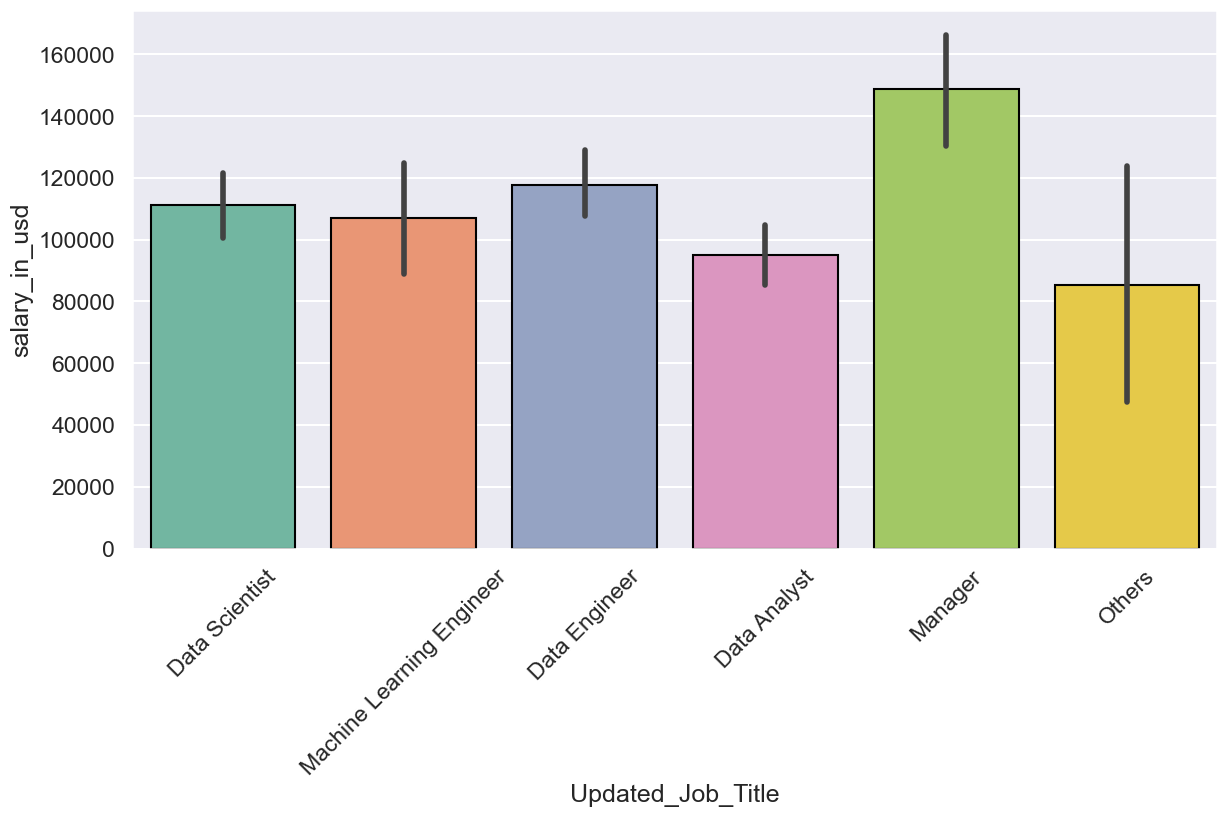

In [24]:
plt.figure(figsize=(14,7))
sns.barplot(x = 'Updated_Job_Title', y = 'salary_in_usd', data = df,ec = "black",palette="Set2")
plt.xticks(rotation= 45)
plt.show()

#### Insights
- Managers are earning more compared to other roles which is expected.
- It is interesting to note that Data Engineers are earning a bit more compared to ML Engineer and Data Scientist.
- Salaries of ML Engineer varies more compared to other roles.

#### Is there any relation between company location and experience level ?


<Axes: xlabel='employee_residence', ylabel='salary_in_usd'>

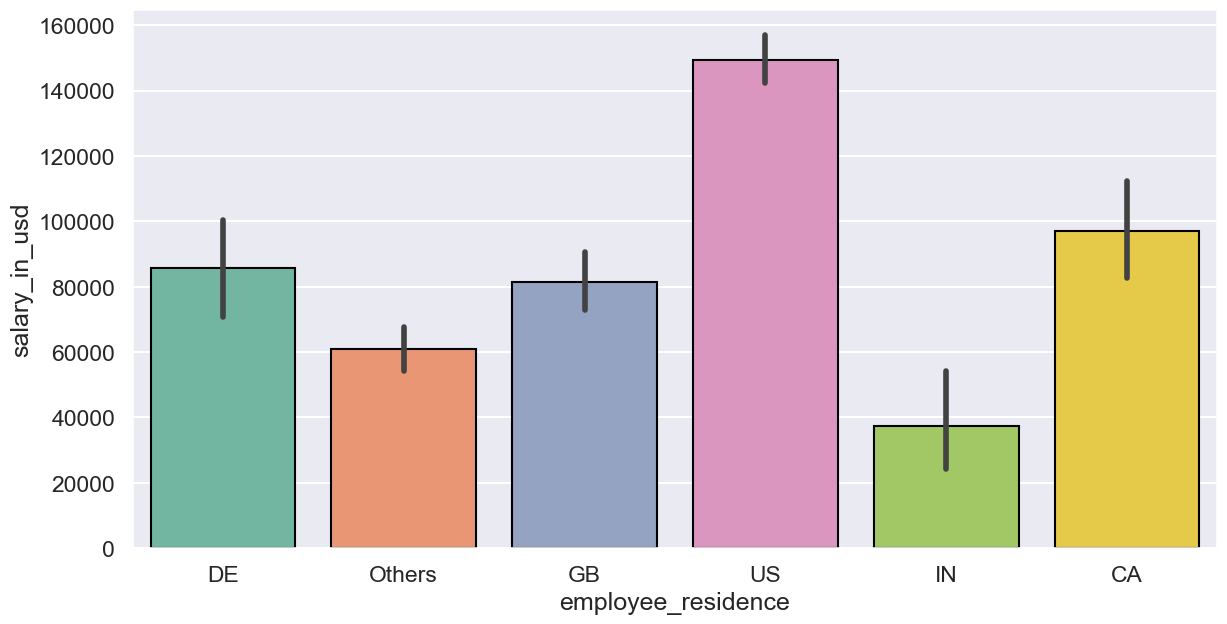

In [25]:
plt.figure(figsize=(14,7))
sns.barplot(x = 'employee_residence', y = 'salary_in_usd', data = df,ec = "black",palette="Set2")

#### Insights
- It can be observed that employess of US are earning more compared to employees of other locations.
- Employees residing in India are earning comparively less when compared to other employees of other nations .

#### Is there any relation between salary and company size ?

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

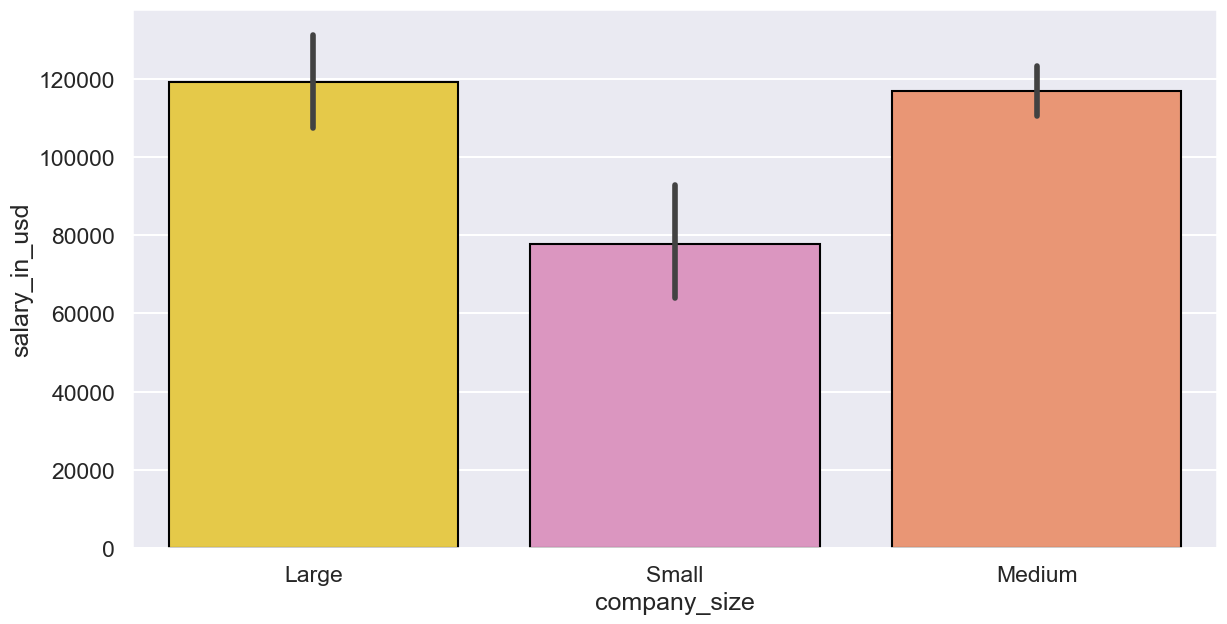

In [26]:
plt.figure(figsize=(14,7))
sns.barplot(x = 'company_size', y = 'salary_in_usd', data = df,ec = "black", palette="Set2_r")

#### Insights
- Medium and Large size companies are almost giving almost equal salary.
- Small size companies are paying less.

#### Multivariate Analysis


<Axes: xlabel='company_size', ylabel='salary_in_usd'>

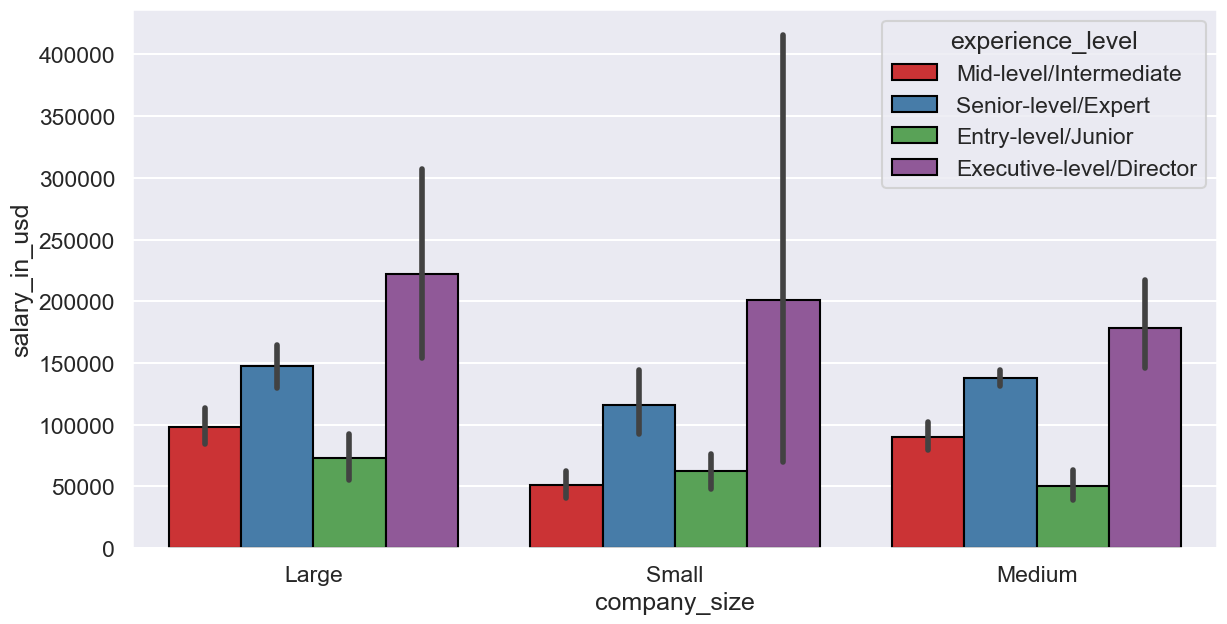

In [27]:
plt.figure(figsize=(14,7))
sns.barplot(x = 'company_size', y = 'salary_in_usd', hue = 'experience_level', data = df,ec = "black",palette="Set1")

#### Insights
- Whether Large, Small or Medium organisation,Executive-level/Director are getting highest salary.

In [28]:
US_data = df[df['employee_residence'] == 'US']

In [29]:
US_data_scientist = US_data[US_data['Updated_Job_Title']  == 'Data Scientist'] 
US_data_engineer = US_data[US_data['Updated_Job_Title']  == 'Data Engineer']
US_data_analyst = US_data[US_data['Updated_Job_Title'] == 'Data Analyst']
US_ml_engineer = US_data[US_data['Updated_Job_Title'] == 'Machine Learning Engineer']
US_manager = US_data[US_data['Updated_Job_Title'] == 'Manager']

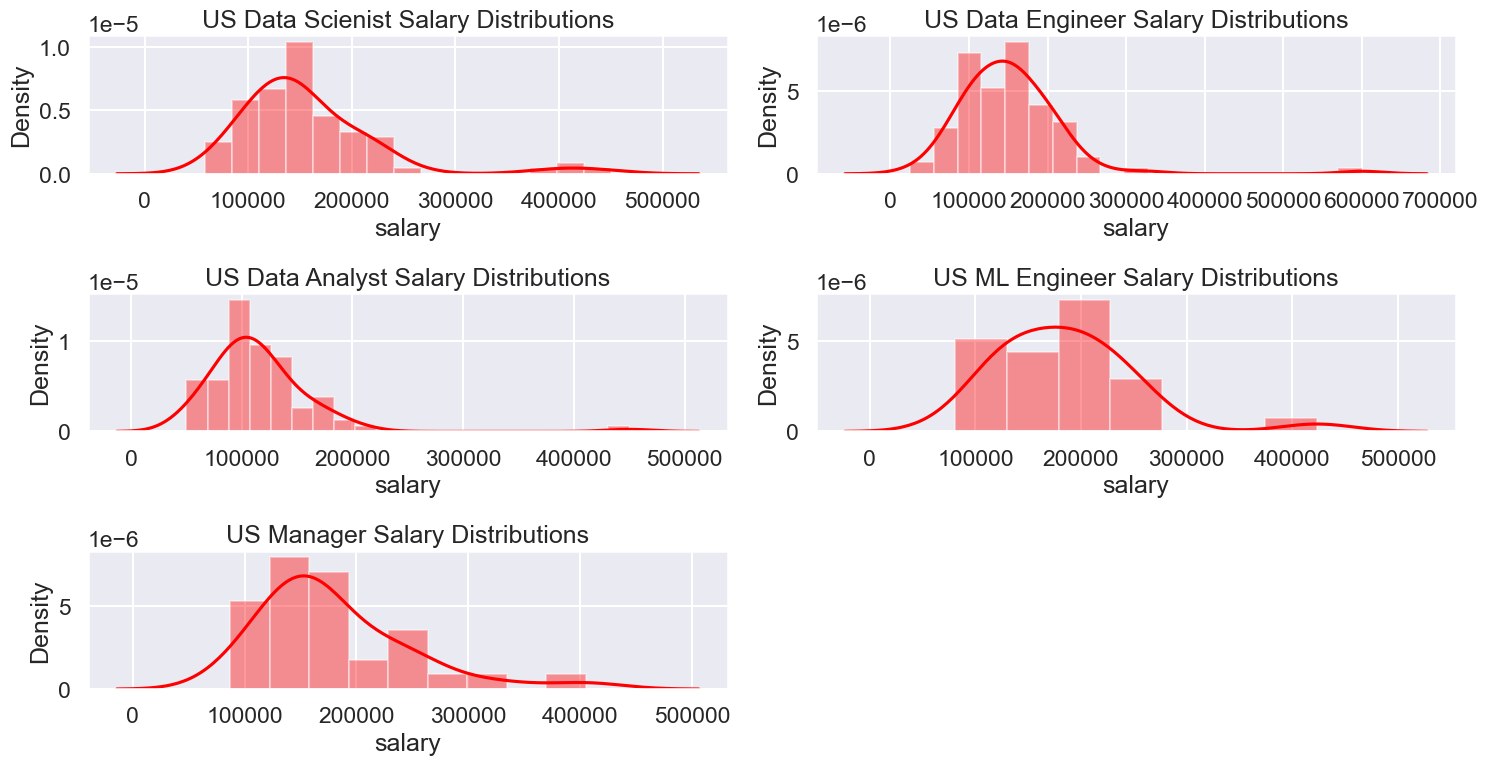

In [30]:
plt.figure(figsize=(15,8))
plt.subplot(3,2,1)
sns.distplot(US_data_scientist['salary'], color='red', kde=True, label='train')
plt.title('US Data Scienist Salary Distributions')
plt.subplot(3,2,2)
sns.distplot(US_data_engineer['salary'], color='red', kde=True, label='train')
plt.title('US Data Engineer Salary Distributions')
plt.subplot(3,2,3)
sns.distplot(US_data_analyst['salary'], color='red', kde=True, label='train')
plt.title('US Data Analyst Salary Distributions')
plt.subplot(3,2,4)
sns.distplot(US_ml_engineer['salary'], color='red', kde=True, label='train')
plt.title('US ML Engineer Salary Distributions')
plt.subplot(3,2,5)
sns.distplot(US_manager['salary'], color='red', kde=True, label='train')
plt.title('US Manager Salary Distributions')
plt.tight_layout()

#### Insights
- We can see for all designations salary mostly distributed between 100k and 300k.
- We can treat Above 300K as outliers.

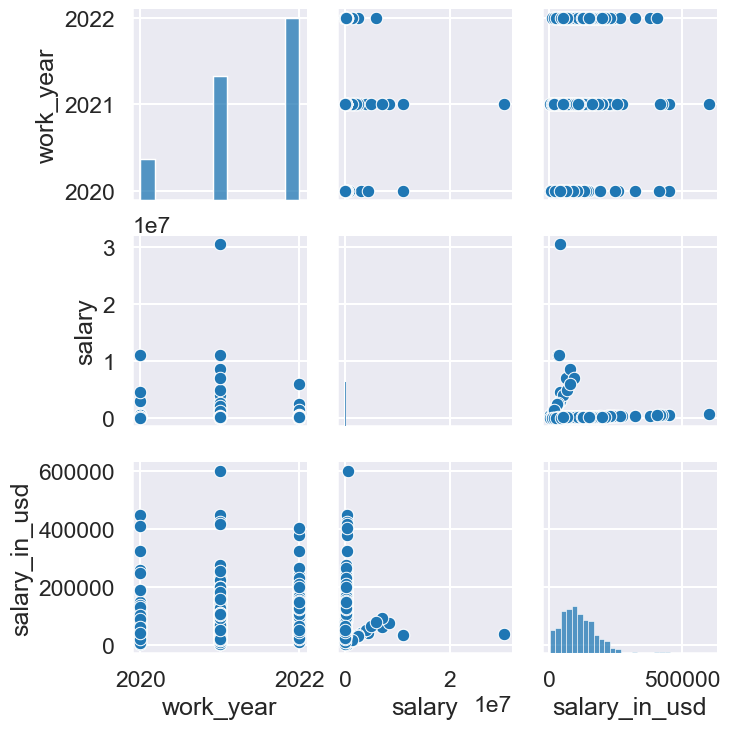

In [31]:
sns.pairplot(df);

#### How has the average salary of data science jobs change over time?


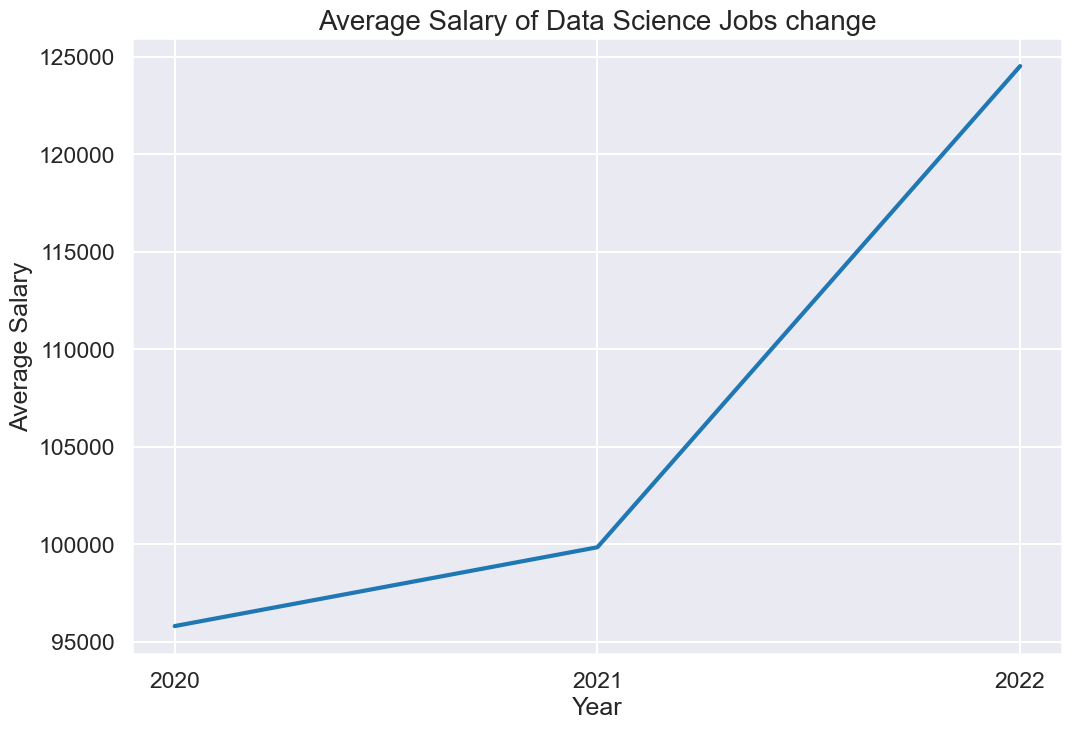

In [32]:
avg_sal_change=df.groupby('work_year')['salary_in_usd'].mean()
plt.figure(figsize=(12,8))
sns.lineplot(x=avg_sal_change.index,y=avg_sal_change.values,linewidth=3)

xticks=[2020,2021,2022]
plt.xticks(xticks,xticks)
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.title('Average Salary of Data Science Jobs change', size=20);

#### Insights
- The average salaries increased from approximately 96000USD in 2020 to 100000USD in 2021 and finally 125000USD in 2022.
- This shows a positive trend and shows that data science jobs are becoming more valuable as the years pass.

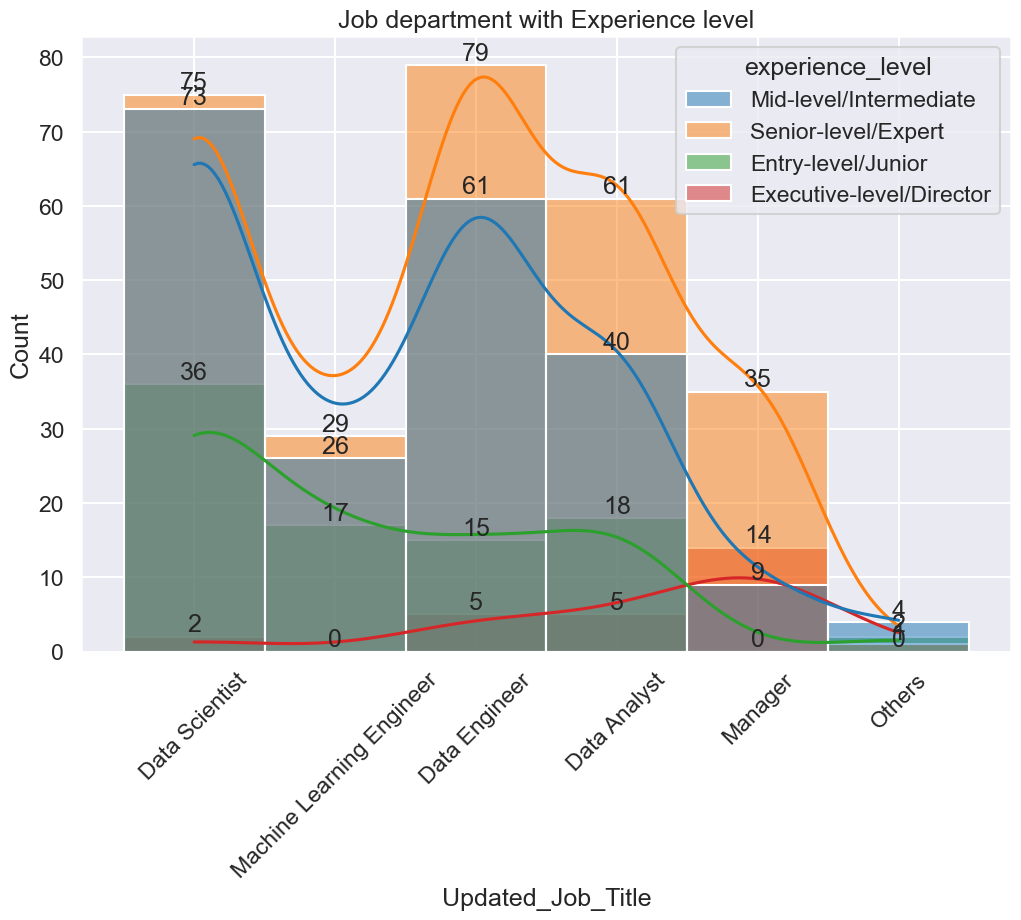

In [33]:
#experienced employees number in different data science job profiles histogram
plt.figure(figsize=(12,8))
ax = sns.histplot(x = "Updated_Job_Title" , hue = "experience_level" , data = df  , kde = True )
plt.title("Job department with Experience level")
plt.xticks(rotation=45);
for i in ax.containers:     #to set a label on top of the bars.
    ax.bar_label(i,)

#### Insights
- Data Scientist(36) job profile has maximum number of entry level employees.after that data analyst(17) and ML engineer(15) comes.
- Data Scientist(73) job profile has maximum number of Mid-level employees.after that data engineer(61) and data analyts(40) comes.
- manager(9) job profile has maximum number of Executive-level employees.after that data engineer(5) and data analyts(5) comes.

### Conclusions-
- Majority of the Data science professionals are working as full time employee.

- Experience level plays a significant role on salary.

- Most common job_title in data science fields are:

       - Data Scientist
       - Data Engineer
       - Data Analyst
       - Machine Learning Engineer
       - Managers
       - Others

- Among job titles Manager are paid more compared to other job titles.

- Majority of data points are from US and hence it becomes a little difficult to do any analysis based on location

- Salary is directly proporptional to experience_level that means higher the experience, higher the salary.

- Data Science Salaries are higher in US comparing to other western countries, India on the other hand has lower salaries.